In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [34]:
# Load dataset 
df = pd.read_csv("Data/final_data.csv", index_col=0)
df.sort_values(by=['game_id'], ascending=False, inplace=True)
df

,game_id,season,week,team,opponent,score,home,ewma_dynamic_window_rushing_offense_team,ewma_dynamic_window_passing_offense_team,ewma_dynamic_window_rushing_defense_team,...,team_id,rest_differential,windy,div_game,spread_line,total_line,game_type,location,total,implied_points
10849,2023_03_TEN_CLE,2023,3,TEN,CLE,3,0,-0.053661,-0.144790,-0.262977,...,2023_03_TEN_CLE_A,1,0,0,-3.5,38.0,REG,Home,30.0,17.25
10848,2023_03_TEN_CLE,2023,3,CLE,TEN,27,1,0.014761,-0.169051,-0.114246,...,2023_03_TEN_CLE_H,-1,0,0,3.5,38.0,REG,Home,30.0,20.75
10847,2023_03_PIT_LV,2023,3,PIT,LV,23,0,-0.083668,-0.045490,-0.052829,...,2023_03_PIT_LV_A,-1,0,0,-3.0,43.5,REG,Home,41.0,20.25
10846,2023_03_PIT_LV,2023,3,LV,PIT,18,1,-0.172352,0.042505,0.030255,...,2023_03_PIT_LV_H,1,0,0,3.0,43.5,REG,Home,41.0,23.25
10845,2023_03_PHI_TB,2023,3,PHI,TB,25,0,0.054647,0.044046,-0.163565,...,2023_03_PHI_TB_A,3,0,0,6.0,44.0,REG,Home,36.0,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2003_01_BAL_PIT,2003,1,BAL,PIT,15,0,NaN,NaN,NaN,...,2003_01_BAL_PIT_A,0,0,1,-4.0,38.5,REG,Home,49.0,17.25
2,2003_01_ATL_DAL,2003,1,DAL,ATL,13,1,NaN,NaN,NaN,...,2003_01_ATL_DAL_H,0,0,0,2.0,36.5,REG,Home,40.0,19.25
3,2003_01_ATL_DAL,2003,1,ATL,DAL,27,0,NaN,NaN,NaN,...,2003_01_ATL_DAL_A,0,0,0,-2.0,36.5,REG,Home,40.0,17.25
1,2003_01_ARI_DET,2003,1,ARI,DET,24,0,NaN,NaN,NaN,...,2003_01_ARI_DET_A,0,0,0,-3.5,39.0,REG,Home,66.0,17.75


In [35]:
current_season = 2023
current_week = 4

In [37]:
data = df.loc[df['season'] >= 2023]
current_week_index = data[(data['season'] == 2023) & (data['week'] == 4)].index
data = data.drop(current_week_index, inplace=False)
data = data[['score', 'ewma_dynamic_window_rushing_offense_team',
       'ewma_dynamic_window_passing_offense_team',
       'ewma_dynamic_window_rushing_defense_opp',
       'ewma_dynamic_window_passing_defense_opp',
       'home', 'rest_differential', 'windy', 'div_game']]

data = data.dropna(inplace=False)
data

,score,ewma_dynamic_window_rushing_offense_team,ewma_dynamic_window_passing_offense_team,ewma_dynamic_window_rushing_defense_opp,ewma_dynamic_window_passing_defense_opp,home,rest_differential,windy,div_game
10849,3,-0.053661,-0.144790,-0.114246,-0.227501,0,1,0,0
10848,27,0.014761,-0.169051,-0.262977,0.126135,1,-1,0,0
10847,23,-0.083668,-0.045490,0.030255,0.114040,0,-1,0,0
10846,18,-0.172352,0.042505,-0.052829,-0.008514,1,1,0,0
10845,25,0.054647,0.044046,-0.152431,0.083396,0,3,0,0
...,...,...,...,...,...,...,...,...,...
10758,24,-0.026469,-0.040349,-0.129229,0.047124,1,0,0,1
10757,16,0.033549,0.037813,-0.018058,-0.071646,0,0,0,1
10756,22,-0.171890,-0.131506,-0.095516,-0.000721,1,0,0,1
10755,16,-0.065665,-0.212918,-0.136350,-0.044526,0,0,0,0


In [38]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['score'])  
y = data['score']

In [39]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)

(86, 8) (10, 8)


In [43]:
# Build the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

In [44]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
3/3 [==============================] - 0s 997us/step - loss: 631.2240
Epoch 2/100
3/3 [==============================] - 0s 997us/step - loss: 626.6212
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 622.0143
Epoch 4/100
3/3 [==============================] - 0s 1ms/step - loss: 617.2643
Epoch 5/100
3/3 [==============================] - 0s 997us/step - loss: 612.4708
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 607.6574
Epoch 7/100
3/3 [==============================] - 0s 1ms/step - loss: 602.5331
Epoch 8/100
3/3 [==============================] - 0s 1ms/step - loss: 596.8371
Epoch 9/100
3/3 [==============================] - 0s 997us/step - loss: 591.2838
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 585.5681
Epoch 11/100
3/3 [==============================] - 0s 998us/step - loss: 579.8314
Epoch 12/100
3/3 [==============================] - 0s 998us/step - loss: 573.7687
Epoch 13/100
3/3 [=======

In [46]:
# Evaluate the model on the testing data
train_loss = model.evaluate(X_train, y_train, verbose=0)
loss = model.evaluate(X_test, y_test, verbose=0)
print(model.summary())
print(f'Mean Squared Error on Train Data: {train_loss}')
print(f'Mean Squared Error on Test Data: {loss}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                288       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Mean Squared Error on Train Data: 90.58309173583984
Mean Squared Error on Test Data: 127.39803314208984


In [47]:
# Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 0s 33ms/step


In [48]:
# Creating a df with the actual scores to merge back with the other data on index
frame = {'actual_score': y_test}
actuals = pd.DataFrame(frame)
actuals

,actual_score
10769,9
10772,13
10776,34
10755,16
10816,33
10770,21
10780,7
10807,20
10849,3
10839,15


In [49]:
merge_df = df[['game_id', 'season', 'week', 'team', 'opponent', 'spread_line', 'total_line', 'score', 'implied_points',]]
results = actuals.merge(merge_df, left_index = True, right_index = True)
results

,actual_score,game_id,season,week,team,opponent,spread_line,total_line,score,implied_points
10769,9,2023_01_HOU_BAL,2023,1,HOU,BAL,-9.5,43.5,9,17.00
10772,13,2023_01_LA_SEA,2023,1,SEA,LA,4.5,45.0,13,24.75
10776,34,2023_01_MIA_LAC,2023,1,LAC,MIA,3.0,50.5,34,26.75
10755,16,2023_01_ARI_WAS,2023,1,ARI,WAS,-7.0,38.0,16,15.50
10816,33,2023_02_WAS_DEN,2023,2,DEN,WAS,4.0,38.5,33,21.25
10770,21,2023_01_JAX_IND,2023,1,IND,JAX,-4.0,45.5,21,20.75
10780,7,2023_01_SF_PIT,2023,1,PIT,SF,-1.5,41.5,7,20.00
10807,20,2023_02_NO_CAR,2023,2,NO,CAR,3.0,39.5,20,21.25
10849,3,2023_03_TEN_CLE,2023,3,TEN,CLE,-3.5,38.0,3,17.25
10839,15,2023_03_NE_NYJ,2023,3,NE,NYJ,2.5,35.5,15,19.00


In [51]:
# Okay now adding in the predictions
results['prediction'] = predictions
results

,actual_score,game_id,season,week,team,opponent,spread_line,total_line,score,implied_points,prediction
10769,9,2023_01_HOU_BAL,2023,1,HOU,BAL,-9.5,43.5,9,17.00,18.458082
10772,13,2023_01_LA_SEA,2023,1,SEA,LA,4.5,45.0,13,24.75,17.401548
10776,34,2023_01_MIA_LAC,2023,1,LAC,MIA,3.0,50.5,34,26.75,16.353704
10755,16,2023_01_ARI_WAS,2023,1,ARI,WAS,-7.0,38.0,16,15.50,17.196354
10816,33,2023_02_WAS_DEN,2023,2,DEN,WAS,4.0,38.5,33,21.25,11.676122
10770,21,2023_01_JAX_IND,2023,1,IND,JAX,-4.0,45.5,21,20.75,21.849634
10780,7,2023_01_SF_PIT,2023,1,PIT,SF,-1.5,41.5,7,20.00,20.924639
10807,20,2023_02_NO_CAR,2023,2,NO,CAR,3.0,39.5,20,21.25,21.139048
10849,3,2023_03_TEN_CLE,2023,3,TEN,CLE,-3.5,38.0,3,17.25,16.645477
10839,15,2023_03_NE_NYJ,2023,3,NE,NYJ,2.5,35.5,15,19.00,18.937853


In [52]:
# Comparing the errors
mse_vegas =  mean_squared_error(results.score, results.implied_points)
mse_model =  mean_squared_error(results.score, results.prediction)
print(f'Mean Squared Error - Vegas: {mse_vegas}')
print(f'Mean Squared Error - Model: {mse_model}')

Mean Squared Error - Vegas: 78.2625
Mean Squared Error - Model: 127.39803492882974


1/1 [==============================] - 0s 15ms/step


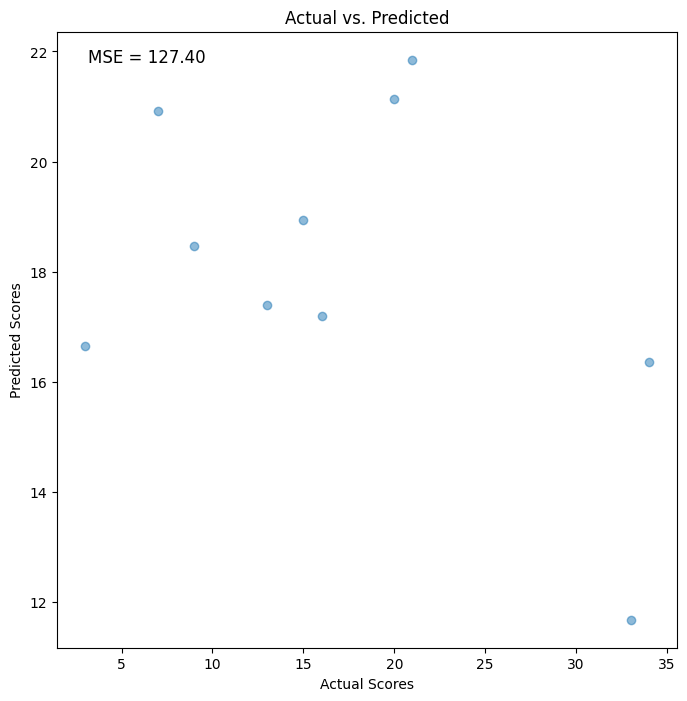

In [53]:
# Plotting results
import matplotlib.pyplot as plt

# Assuming you have trained the model and have predictions stored in 'y_pred'
y_pred = model.predict(X_test)

# Plotting actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

# Add MSE as an annotation
plt.annotate(f'MSE = {mse_model:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()


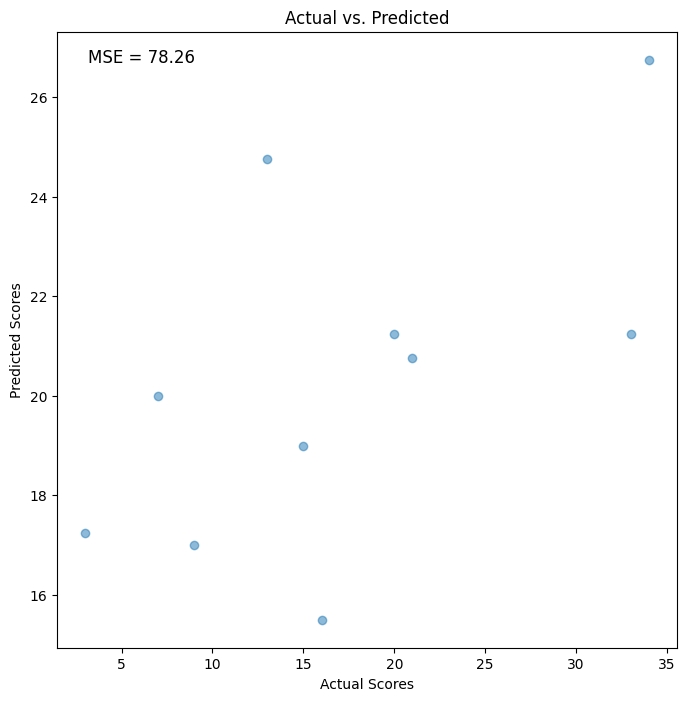

In [54]:
# Plotting results - Vegas
import matplotlib.pyplot as plt

# Getting implied points from above
vegas = results.implied_points

# Plotting actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, vegas, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

# Add MSE as an annotation
plt.annotate(f'MSE = {mse_vegas:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

In [58]:
# Testing the 2023 season

current_season_test = df.loc[(df['season'] == 2023) & (df['week'] == 4)].sort_values(by=['game_id'], ascending = False)
current_season_test = current_season_test[['ewma_dynamic_window_rushing_offense_team',
       'ewma_dynamic_window_passing_offense_team',
       'ewma_dynamic_window_rushing_defense_opp',
       'ewma_dynamic_window_passing_defense_opp',
       'home', 'rest_differential', 'windy', 'div_game']]

current_season_test = current_season_test.dropna(inplace=False)


In [59]:
predictions = model.predict(current_season_test)

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [55]:
results = df.loc[(df['season'] == 2023) & (df['week'] == 4)].sort_values(by=['game_id'], ascending = False)
# results = results[['game_id, season, week, team, opponent, score, home, spread_line, total_line, total, implied_points']]
results['prediction'] = predictions
results['actual'] = results.score
results.drop(columns=['ewma_dynamic_window_rushing_offense_team',
       'ewma_dynamic_window_passing_offense_team',
       'ewma_dynamic_window_rushing_defense_team',
       'ewma_dynamic_window_passing_defense_team',
       'ewma_dynamic_window_rushing_offense_opp',
       'ewma_dynamic_window_passing_offense_opp',
       'ewma_dynamic_window_rushing_defense_opp',
       'ewma_dynamic_window_passing_defense_opp', 'team_id','score'], inplace = True)
results

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [22]:
# Comparing the errors
mse_vegas =  mean_squared_error(results.actual, results.implied_points)
mse_model =  mean_squared_error(results.actual, results.prediction)
print(f'Mean Squared Error - Vegas: {mse_vegas}')
print(f'Mean Squared Error - Model: {mse_model}')

Mean Squared Error - Vegas: 133.66796875
Mean Squared Error - Model: 180.3042547115536
